## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
df1 = pd.read_csv('RegData.csv', header=None)

#### Explore your data

In [3]:
df1

,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
x=df1[0]
x

0     2.9
1     6.7
2     4.9
3     7.9
4     9.8
5     6.9
6     6.1
7     6.2
8     6.0
9     5.1
10    4.7
11    4.4
12    5.8
Name: 0, dtype: float64

#### Explore your data

In [5]:
y=df1[1]

In [6]:
y

0     4.0
1     7.4
2     5.0
3     7.2
4     7.9
5     6.1
6     6.0
7     5.8
8     5.2
9     4.2
10    4.0
11    4.4
12    5.2
Name: 1, dtype: float64

#### Plot the original data (scatter plot of X,y)

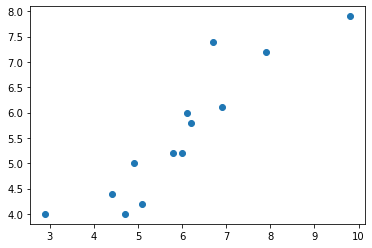

In [7]:
plt.scatter(x,y)

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

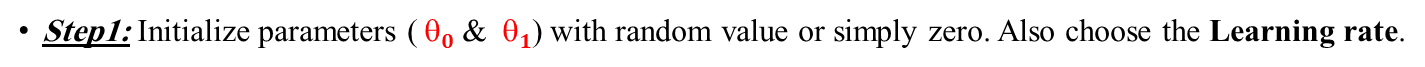

In [8]:
theta0 =np.random.random()
theta1 =np.random.random()

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.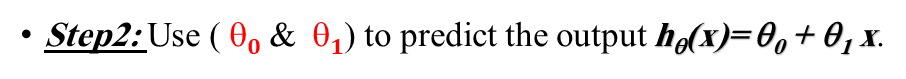
#### Note: you will need to iterate through all data points

In [9]:
pred = theta0 + theta1*x
pred

0     1.443199
1     2.892929
2     2.206215
3     3.350739
4     4.075605
5     2.969231
6     2.664025
7     2.702175
8     2.625874
9     2.282516
10    2.129913
11    2.015461
12    2.549572
Name: 0, dtype: float64

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).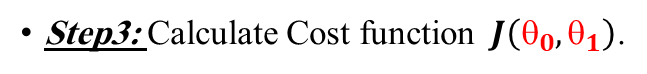
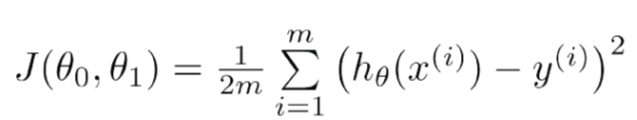

In [10]:
cost = 0
for i in range(len(x)):
    cost += ((pred[i] - y[i])**2)
cost/= 2*len(x)    
cost

4.659108084222966

### Step4: Calculate the gradient.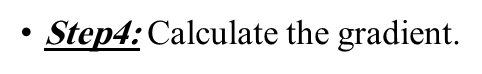
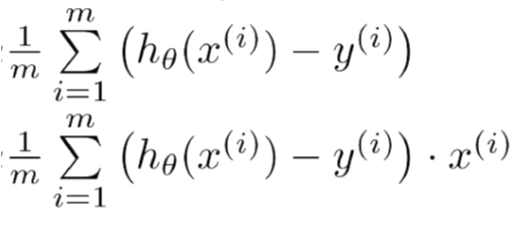

In [11]:
grad0 = 0
grad1 = 0
for i in range(len(x)):
    grad0 += (pred[i]-y[i])
    grad1 += (pred[i]-y[i])*x[i]
grad0/=len(x)
grad1/=len(x)
# print(grad0)
# print(grad1)

### Step5: Update the parameters (simultaneously).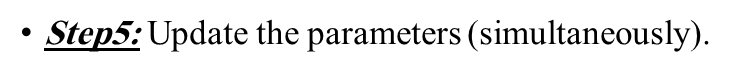
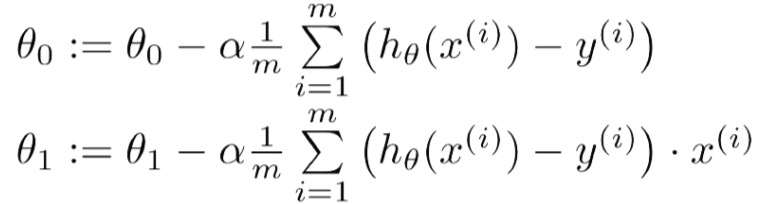

In [12]:
alpha = 0.01
theta0 -= alpha * grad0
theta1 -= alpha * grad1
print(theta0)
print(theta1)

0.3664347758862895
0.5662972883673874


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.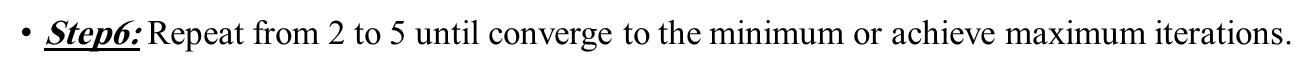

In [13]:
theta0 =0
theta1 =0
losses = []
for j in range(5):
    grad = 0
    for i in range(len(x)):
        grad += (pred[i]-y[i])
    grad/=len(x)
    theta0 -= alpha * grad
    theta1 -= alpha * grad*x[i]
    losses.append((1/2*len(y)) * grad *grad)
print(theta0)
print(theta1)

0.14804824996881516
0.8586798780963438


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [14]:
h = theta0 + theta1*x
y-h

0     1.361780
1     1.498797
2     0.644420
3     0.268380
4    -0.663111
5     0.027060
6     0.614005
7     0.328137
8    -0.100128
9    -0.327316
10   -0.183844
11    0.473760
12    0.071608
dtype: float64

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

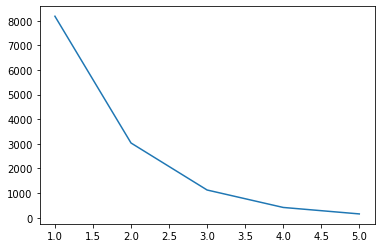

In [15]:
x_vec = np.c_[np.ones(x.shape[0]), x]
thetas = np.zeros(2)
losses = []
for i in range(5):
    pred = np.dot(x_vec,thetas)
    error = pred-y
    grad = np.dot(x_vec.T,error)*(1/len(y))
    thetas -= grad*alpha
    losses.append((1/2*len(y)) * np.dot(grad.T,grad))
plt.plot(np.arange(1,6,1),losses)
y_vec = np.dot(x_vec,thetas)

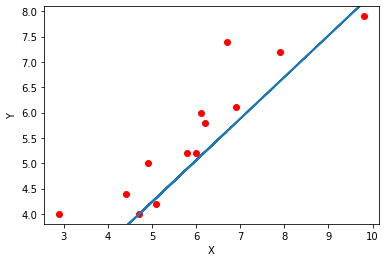

In [16]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y, color='red')
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
line, = ax.plot([], [], lw=2)
line.set_data(x, y_vec)
plt.show()

#### Use R2 score to evaluate LR equation output
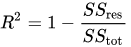
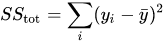
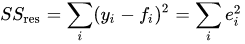
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [17]:
sstot = 0
ymean = np.mean(y)
for i in range(len(y)):
    sstot += (y[i] - ymean)**2
ssres =0 
for i in range(len(y)):
    sstot += (y[i] - pred[i])**2
r2 = 1-(ssres/sstot)
r2

1.0

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [18]:
x_vec = np.c_[np.ones(x.shape[0]), x]
thetas = np.zeros(2)
losses = []
for i in range(5):
    pred = np.dot(x_vec,thetas)
    error = pred-y
    grad = np.dot(x_vec.T,error)*(1/len(y))
    thetas -= grad*alpha
y_vec = np.dot(x_vec,thetas)

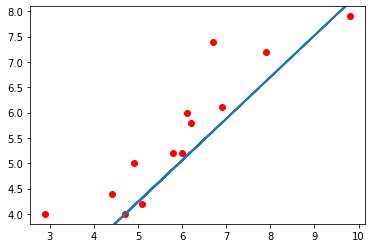

In [19]:
fig = plt.figure()
ax = plt.axes()

plt.scatter(x, y, color='red')
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
line, = ax.plot([], [], lw=2)
line.set_data(x, y_vec)
plt.show()

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

In [20]:
sstot = 0
ymean = np.mean(y)
for i in range(len(y)):
    sstot += (y[i] - ymean)**2
ssres =0 
for i in range(len(y)):
    sstot += (y[i] - y_vec[i])**2
r2 = 1-(ssres/sstot)
r2

1.0

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [21]:
x_vec = np.c_[np.ones(x.shape[0]), x]
thetas = np.zeros(2)
losses = []
for i in range(5):
    pred = np.dot(x_vec,thetas)
    error = pred-y
    grad = np.dot(x_vec.T,error)*(1/len(y))
    thetas -= grad*alpha
    losses.append((1/2*len(y)) * np.dot(error.T,error))
y_vec = np.dot(x_vec,thetas)

### Plot loss vs. iterations

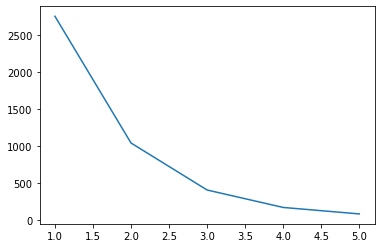

In [22]:
plt.plot(np.arange(1,6,1),losses)

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [23]:
df2 = pd.read_csv('MultipleLR.csv')

In [24]:
x2 = df2[['x1','x2','x3']]
x2

,x1,x2,x3
0,73,80,75
1,93,88,93
2,89,91,90
3,96,98,100
4,73,66,70
5,53,46,55
6,69,74,77
7,47,56,60
8,87,79,90
9,79,70,88


In [25]:
y2 = df2['y']
y2

0     152
1     185
2     180
3     196
4     142
5     101
6     149
7     115
8     175
9     164
10    141
11    141
12    184
13    152
14    148
15    192
16    147
17    183
18    177
19    159
20    177
21    175
22    175
23    149
24    192
Name: y, dtype: int64

### Repeat your implementation but for more than one variable

In [26]:
x_vec2 = np.c_[np.ones(x2.shape[0]), x2]
thetas = np.zeros(x_vec2.shape[1])
losses = []
alpha = 0.000075
itr = len(y2*15)
for i in range(itr):
    pred = np.dot(x_vec2,thetas)
    error = pred-y2
    grad = np.dot(x_vec2.T,error)*(1/len(y2))
    thetas -= grad*alpha
    losses.append((1/2*len(y2)) * np.dot(error.T,error))

In [27]:
losses[-1]

3554.9315064729726

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [28]:
y_vec2 = np.dot(x_vec2,thetas)

### Plot loss vs. iterations

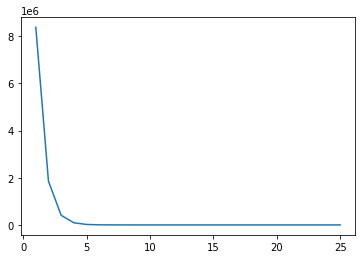

In [29]:
plt.plot(np.arange(1,itr+1,1),losses)

#### Use R2 score to evaluate LR equation output

In [30]:
from sklearn.metrics import r2_score
r2_score(y2, y_vec2)

0.9795306689845023

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [31]:
from sklearn.linear_model import LinearRegression

#### Train the model (fit the model to the training data)

In [32]:
_x = np.array(df1[0]).reshape(-1,1)
_y= np.array(df1[1]).reshape(-1,1)
# x
reg = LinearRegression().fit(_x, _y)

#### Predict y values using the trained model

In [34]:
_y = reg.predict(_x)

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

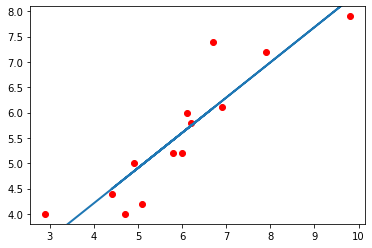

In [35]:
fig = plt.figure()
ax = plt.axes()

plt.scatter(df1[0], df1[1], color='red')
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
line, = ax.plot([], [], lw=2)
line.set_data(df1[0], _y)
plt.show()

#### Use R2 score to evaluate model output

In [36]:
r2_score(_y, y)

0.782441359655599

### Repeat for Mulivariate

In [37]:
x = np.array(df2[['x1','x2','x3']])
_y= np.array(df2['y']).reshape(-1,1)
# x
reg = LinearRegression().fit(x, _y)

In [38]:
pred2 = reg.predict(x)

In [39]:
r2_score(pred2,_y)

0.9895535794506818